In [ ]:
!pip3 install pymc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 28.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: arviz
    Found existing installation: arviz 0.12.1
    Uninstalling arviz-0.12.1:
      Successfully uninstalled arviz-0.12.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.10.1 which is incompatible.
librosa 0.10.0.post2 requires numpy!=1.22.0,!=1.22.1,!=1.22.2,>=1.20.3, but you have numpy 1.22.1 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from sklearn.linear_model import LogisticRegression
import pymc as pm

## The Dataset

You can download the dataset from here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## 1 point

## ToDo: read the csv file into a dataframe and show the first 5 rows
diab_df = pd.read_csv('/content/drive/MyDrive/DATA606/diabetes.csv')
diab_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
## 3 points

## Assign the Outcome variable to y and the rest to X.
y = diab_df['Outcome']
X = diab_df.drop(['Outcome'],axis=1)
## USe LogisticRegression to fit the data and print out the intercept and the coefficients
model = LogisticRegression(max_iter = 1000).fit(X,y)
print('The intercept is ', model.intercept_)
print('The coefficients are ', model.coef_)

The intercept is  [-8.365745]
The coefficients are  [[ 1.22360947e-01  3.51105693e-02 -1.32968752e-02  7.86285043e-04
  -1.17366065e-03  8.96772163e-02  8.66279720e-01  1.50063634e-02]]


In [ ]:
## 2 points

## Explain what the code is doing:
## What are the prior probabilities of the intercept and coefficients?
# Which likelihood distribution has been used?
## What does pm.invlogit(linreg) mean?
## What is map_est?

with pm.Model() as logreg_model:
  
    w0 = pm.Normal('w0', mu=0, sigma=100)
    w1 = pm.Normal('w1', mu=0, sigma=100)
    w2 = pm.Normal('w2', mu=0, sigma=100)
    w3 = pm.Normal('w3', mu=0, sigma=100)
    w4 = pm.Normal('w4', mu=0, sigma=100)
    w5 = pm.Normal('w5', mu=0, sigma=100)
    w6 = pm.Normal('w6', mu=0, sigma=100)
    w7 = pm.Normal('w7', mu=0, sigma=100)
    w8 = pm.Normal('w8', mu=0, sigma
                   =100)
   
    
    linreg = w0 * np.ones(diab_df.shape[0]) + w1 * diab_df.Pregnancies.values + w2 * diab_df.Glucose.values \
    + w3 * diab_df.BloodPressure.values + w4 * diab_df.SkinThickness.values + w5 * diab_df.Insulin.values + \
    w6 * diab_df.BMI.values + w7 * diab_df.DiabetesPedigreeFunction.values + w8 * diab_df.Age.values
    p_outcome = pm.invlogit(linreg)

    likelihood = pm.Bernoulli('likelihood', p_outcome, observed=diab_df.Outcome.values)

    
    map_est= pm.find_MAP()
    print(map_est)


{'w0': array(-8.40166888), 'w1': array(0.12311865), 'w2': array(0.0351519), 'w3': array(-0.01329542), 'w4': array(0.00061588), 'w5': array(-0.0011909), 'w6': array(0.0896803), 'w7': array(0.94448272), 'w8': array(0.01486235)}


## Answer

# Explain what the code is doing:
The model assigns normally distributed variables with a mean 0 and standard deviation 100 as the coefficients/weights for linear regression. It evaluates the output 'linreg' as the weighted average of the variables corresponding to the respective columns in the dataframe. It also evaluates the likelihood $P(X,y|w)$ using the Bernoulli distribution and finally, the Maximum A Posteriori (MAP) ($P(w|X,y)$) estimate for the weights.

# What are the prior probabilities of the intercept and coefficients?
The prior probabilities ($P(w)$) of the intercept and coefficients are normally distributed with a mean 0 and standard deviation 100.

# Which likelihood distribution has been used?
Bernoulli distribution is used as the likelihood distribution.

# What does pm.invlogit(linreg) mean?
It calculates the inverse of the logit function $1 / (1 + exp(-x)).$ It gives the probability of obtaining a given outcome 'linreg'.

# What is map_est?
map_est gives the local Maximum A Posteriori (MAP) point estimate for the given model. It can be calculated as the maximum of:
$$P(w|X,y) = P(X,y|w)*P(w)/P(X,y),$$
where $P(w)$ is the prior probability.

array([[<Axes: title={'center': 'w0'}>, <Axes: title={'center': 'w1'}>,
        <Axes: title={'center': 'w2'}>],
       [<Axes: title={'center': 'w3'}>, <Axes: title={'center': 'w4'}>,
        <Axes: title={'center': 'w5'}>],
       [<Axes: title={'center': 'w6'}>, <Axes: title={'center': 'w7'}>,
        <Axes: title={'center': 'w8'}>]], dtype=object)

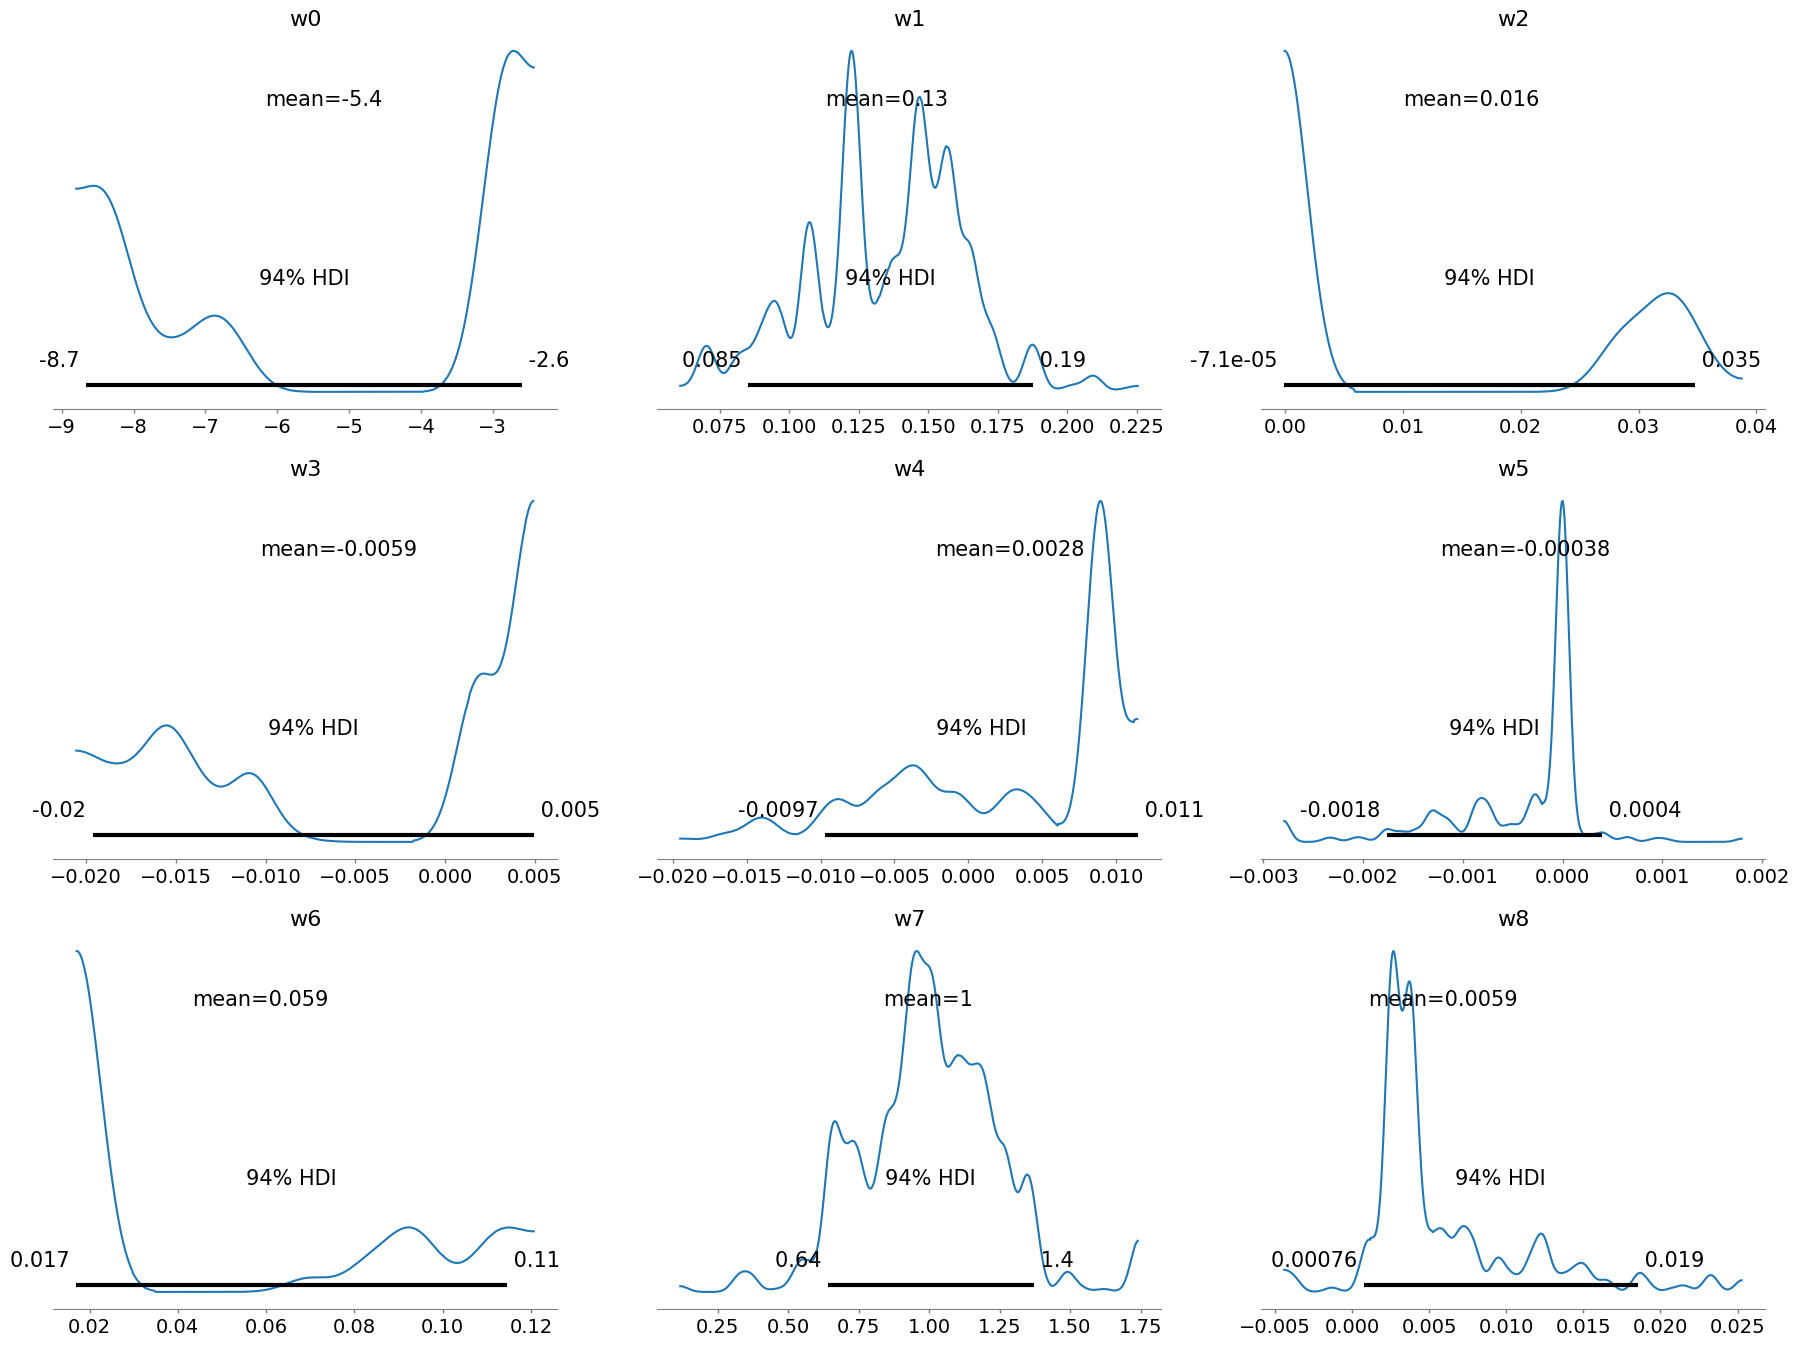

In [ ]:
## 2 points

with logreg_model:
## ToDo: draw 400 samples using pm.Metropolis() and assign to the variable trace
  step = pm.Metropolis()
  trace = pm.sample(400, step = step)
## Explain the output of the plot 
az.plot_posterior(trace)

## Answer

# Explain the output of the plot
The plots are a representation of the a posteriori probability calculated for each of the 8 coefficients of the above linear regression model. 94% HDI (Highest Density Interval) is the interval of the values of those coefficients which covers 94% of top posterior probabilities. Points outside this interval have a lower posterior probability than those inside.